# **Ex. 1 - First steps with scikit-learn**

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# **Ex. 2 - Modeling class probabilities via logistic regression**

### *Part 1 - Train a logistic regression model* (check https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with scikit-learn: use C=100.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. 

Test accuracy: 0.98


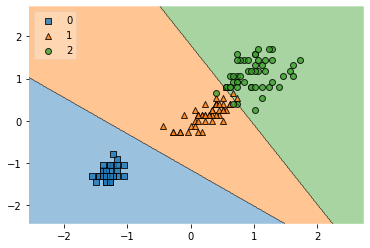

In [6]:
# C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
from sklearn.linear_model import LogisticRegression

def classify_lr_and_evaluate(variable_C):
    lr = LogisticRegression(random_state=1, C=variable_C).fit(X_train_std, y_train)

    plot_decision_regions(X_combined_std, y_combined, lr, legend=2)

    test_accuracy = lr.score(X_test_std, y_test)
    print("Test accuracy: {:.2f}".format(test_accuracy))

classify_lr_and_evaluate(100.0)

### *Part 2 - Tackling overfitting via regularization*: evaluate different values for C (up to 100) and observe the accuracy difference between training and test sets. Plot the results.

In [7]:
# Idea: use ipywidgets to evaluate different values for C

from ipywidgets import interact, widgets

interact(classify_lr_and_evaluate, 
variable_C=widgets.FloatSlider(min=1, max=100, step=.1, value=1.0));

interactive(children=(FloatSlider(value=1.0, description='variable_C', min=1.0), Output()), _dom_classes=('wid…

# **Ex. 3 - Maximum margin classification with support vector machines**

### *Part 1 - Dealing with the nonlinearly separable case using slack variables* (check linear kernel at https://scikit-learn.org/stable/modules/svm.html): use C=1.0 and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set. 

Test accuracy: 0.98


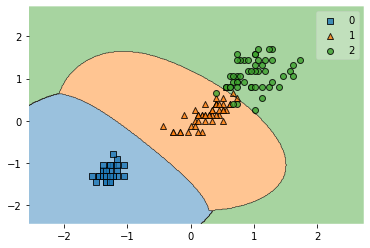

In [8]:
# C: Smaller values specify stronger regularization.

from sklearn.svm import SVC

svm = SVC(random_state=1, C=1.0).fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, svm)

test_accuracy = svm.score(X_test_std, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

### *Part 2 - Using the kernel trick to find separating hyperplanes in higher dimensional space*: use kernel='rbf', C=1.0, gamma=0.2, and random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend and included above). Evaluate the results on the test set. Compare and discuss the results with the previous case. Try different values for the kernel parameter and evaluate the results.

In [44]:
def classify_svm_and_evaluate(variable_kernel):
    svm = SVC(kernel=variable_kernel, C=1.0, gamma=0.2, random_state=1).fit(X_train_std, y_train)

    plot_decision_regions(X_combined_std, y_combined, svm)

    test_accuracy = svm.score(X_test_std, y_test)
    print("Test accuracy: {:.2f}".format(test_accuracy))

interact(classify_svm_and_evaluate, 
variable_kernel=widgets.Dropdown(options=['linear', 'poly', 'rbf', 'sigmoid'], value='rbf'))

interactive(children=(Dropdown(description='variable_kernel', index=2, options=('linear', 'poly', 'rbf', 'sigm…

<function __main__.classify_svm_and_evaluate(variable_kernel)>

# **Ex. 4 - Decision tree learning**

### *Part 1 - Building a decision tree* (check https://scikit-learn.org/stable/modules/tree.html): use criterion='entropy', max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Try different values for the max_depth and check the result.

In [15]:
from sklearn.tree import DecisionTreeClassifier

def classify_tree_and_evaluate(variable_max_depth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=variable_max_depth, random_state=1).fit(X_train_std, y_train)

    plot_decision_regions(X_combined_std, y_combined, tree)

    test_accuracy = tree.score(X_test_std, y_test)
    print("Test accuracy: {:.2f}".format(test_accuracy))

interact(classify_tree_and_evaluate,
variable_max_depth=widgets.IntSlider(min=1, max=10, step=1, value=4));

interactive(children=(IntSlider(value=4, description='variable_max_depth', max=10, min=1), Output()), _dom_cla…

### *Part 2 - Combining weak to strong learners via random forests* (check https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): use criterion='entropy', n_estimators=25, max_depth=4, random_state=1. Plot the decision regions (use plot_decision_regions from mlxtend). Evaluate the results on the test set. Compare with the single tree case. Try different values for the number of trees and check the result.

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 

def classify_tree_vs_rf_and_evaluate(variable_max_depth):
    plt.figure(figsize=(20, 6))
    # Simple decision tree
    plt.subplot(1,2,1)
    plt.title('Simple Decision Tree')
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=variable_max_depth, random_state=1).fit(X_train_std, y_train)
    plot_decision_regions(X_combined_std, y_combined, tree)
    test_accuracy = tree.score(X_test_std, y_test)

    plt.subplot(1,2,2)
    plt.title('Random Forest')
    # Random forest
    rf = RandomForestClassifier(criterion='entropy', n_estimators=25, max_depth=variable_max_depth, random_state=1).fit(X_train_std, y_train)
    plot_decision_regions(X_combined_std, y_combined, rf)
    test_accuracy = rf.score(X_test_std, y_test)

    print("Decision tree's test accuracy: {:.2f}".format(test_accuracy))
    print("Random forest's test accuracy: {:.2f}".format(test_accuracy))


interact(classify_tree_vs_rf_and_evaluate,
variable_max_depth=widgets.IntSlider(min=1, max=10, step=1, value=4));

interactive(children=(IntSlider(value=4, description='variable_max_depth', max=10, min=1), Output()), _dom_cla…